### Import the Library

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Import the Dataset

In [93]:
from sklearn.datasets import load_iris
iris = load_iris()

In [94]:
print(iris.data.shape)

(150, 4)


In [95]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [97]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [98]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [99]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [100]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [101]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Draw a scatter plot on the dataset

In [102]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

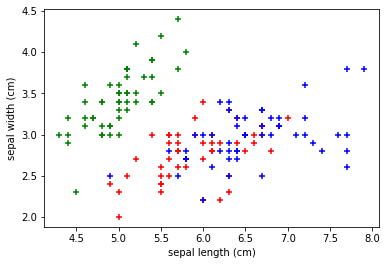

In [103]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'Blue', marker='+')

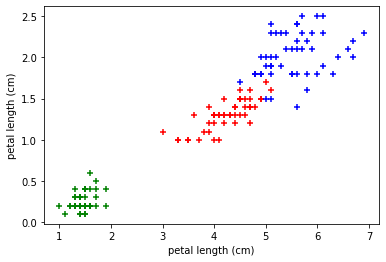

In [104]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal length (cm)')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'red', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'Blue', marker='+')

In [105]:
X = df.drop(['target', 'flower_names'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [106]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Dataset Spliting

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Logistic Regression

In [108]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9777777777777777

In [109]:
y_predicted_lr = lr.predict(X_test)

In [110]:
print(classification_report(y_test, y_predicted_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [111]:
cm = confusion_matrix(y_test, y_predicted_lr)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

Text(42.0, 0.5, 'Truth')

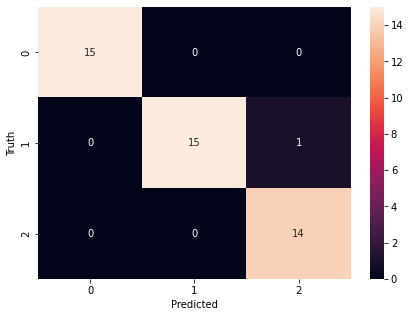

In [112]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Decision Tree

In [113]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9555555555555556

In [114]:
y_predicted_dt = dt.predict(X_test)

In [115]:
print(classification_report(y_test, y_predicted_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      1.00      0.94        16
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Text(69.0, 0.5, 'Truth')

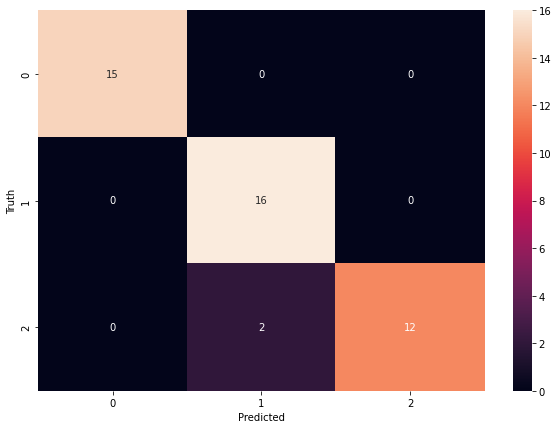

In [116]:
cm = confusion_matrix(y_test, y_predicted_dt)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Random Forest

In [117]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9555555555555556

In [118]:
y_predicted_rf = rf.predict(X_test)

In [119]:
print(classification_report(y_test, y_predicted_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      1.00      0.94        16
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Text(42.0, 0.5, 'Truth')

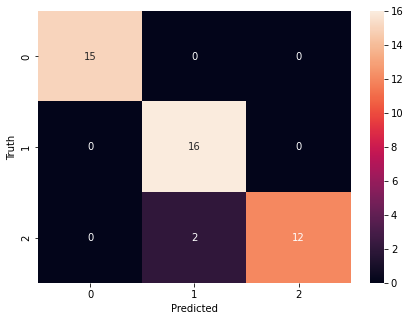

In [120]:
cm = confusion_matrix(y_test, y_predicted_rf)
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')